### Notebook setup for the pydoocs introduction:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Setting the search path for modules to get the local path for the latest build (just for the demo here), and
assert that the latest pydoocs actually gets imported:

In [2]:
import sys
import os
import time

LOCAL_BUILD_PATH = "/home/cbehrens/doocs/Darwin-x86_64/obj/library/python/pydoocs"
sys.path.insert(0, LOCAL_BUILD_PATH) 

import pydoocs 

assert os.path.dirname(pydoocs.__file__) == LOCAL_BUILD_PATH

Setting the test server base address being used throughout this demo:

In [3]:
TEST_SERVER_BASE_ADDRESS = "TEST.DOOCS/UNIT_TEST_SUPPORT/PY_DOOCS/"

# Introduction to pydoocs
#### Table of contents (with internal links):
-  [pydoocs module](#module)
-  [read function](#read)
    -  [wildcard operation](#wildcard)
-  [write function](#write)
    -  [write with output](#write-output)
-  [names function](#names)
-  [exceptions](#exceptions)
-  [synchronized readout](#synchronized-readout)
    -  [via wildcard](#via-wildcard)
    -  [via macropulse](#via-macropulse)
-  [supported data types](#data-types)
-  [api breaking differences](#diff-previous)

<a id="module"></a>
## The pydoocs module:

The pydoocs' module docstring:

In [4]:
pydoocs.__doc__

'Python3 bindings to the standard DOOCS client API written in C/C++.'

The current pydoocs version:

In [5]:
pydoocs.__version__ 

'2.0.0'

The definitions (functions and exception classes) provided by the pydoocs module:

In [6]:
[element for element in dir(pydoocs) if not element.startswith("__")]

['DoocsException', 'PyDoocsException', 'names', 'read', 'write']

<a id="read"></a>
## The read function:


The pydoocs' read function docstring:

In [7]:
pydoocs.read.__doc__

'Function to read data from a given DOOCS address.'

The read function takes at least 1 argument (the DOOCS address to read from) and at most 3 arguments, where the two optional keyword parameters are additional doocs parameters (keyword: parameters) and macropulse number (keyword: macropulse) for synchronization (see [via macropulse](#via-macropulse) below):

In [8]:
try:
    pydoocs.read()
except Exception as err:
    print(err)

Required argument 'address' (pos 1) not found


In [9]:
try:
    pydoocs.read("", "", "", "")
except Exception as err:
    print(err)

function takes at most 3 arguments (4 given)


The output of the read function is a python dict with 5 key-value pairs, where the pair 'miscellaneous' is a dict itself and may be used to return additional information (see an example with a non-empty 'miscellaneous' further below):

In [10]:
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "BOOL")
output

{'data': 0,
 'macropulse': 17281873,
 'miscellaneous': {},
 'timestamp': 1528723309.669095,
 'type': 'BOOL'}

In [11]:
type(output)

dict

In [12]:
output.keys()

dict_keys(['data', 'type', 'timestamp', 'macropulse', 'miscellaneous'])

The 'data' key-value pair contains data according to the requested type and can either be a scalar type (e.g. float, int, bool, ...) as shown above, or a list or a numpy array whenever appropriate as demonstrated in the cases below:

In [13]:
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "SPECTRUM")
output

{'data': array([[  0.        ,   0.        ],
        [  0.1       ,   1.        ],
        [  0.2       ,   4.        ],
        [  0.30000001,   9.        ],
        [  0.40000001,  16.        ],
        [  0.5       ,  25.        ],
        [  0.60000002,  36.        ],
        [  0.69999999,  49.        ],
        [  0.80000001,  64.        ],
        [  0.90000004,  81.        ]], dtype=float32),
 'macropulse': 0,
 'miscellaneous': {'comment': '', 'status': 0, 'timestamp': 1526992495},
 'timestamp': 1528724476.295571,
 'type': 'SPECTRUM'}

In [14]:
type(output["data"])

numpy.ndarray

In [15]:
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "IFFF_ARRAY")
output

{'data': [2, 1.2000000476837158, 2.299999952316284, 3.4000000953674316],
 'macropulse': 0,
 'miscellaneous': {},
 'timestamp': 1528713006.849212,
 'type': 'IFFF'}

In [16]:
type(output["data"])

list

<a id="wildcard"></a>
### wildcard (*) operation:

The wildcard '*' can be utilized to match all possible cases for a readout call, e.g. for reading a property for all locations:

In [17]:
import pprint  # for prettier printing

output = pydoocs.read("FLASH.DIAG/BPM/*/X.FLASH1")  # with wildcard (*) for the DOOCS location

print("data type: ", output["type"])
print("first 5 of", len(output["data"]), "data elements, each with [-, beam position, -, timestamp, location]: ")
pprint.pprint(output["data"][:5])

data type:  A_USTR
first 5 of 54 data elements, each with [-, beam position, -, timestamp, location]: 
[[0, 1.61899995803833, 0.0, 1528724476, '1GUN'],
 [0, 2.0260000228881836, 0.0, 1528724476, '3GUN'],
 [0, 0.0, 0.0, 1528724476, 'IDUMP'],
 [0, 0.574999988079071, 0.0, 1528724476, '2UBC2'],
 [0, 0.4066508710384369, 0.0, 1528724477, '9ACC1']]


<a id="write"></a>
## The write function:

The pydoocs' write function docstring:

In [18]:
pydoocs.write.__doc__

'Function to write data to a given DOOCS address.'

The write function takes at least 2 argument (the DOOCS address to write to and the data to write) and at most 3 arguments, where the optional keyword parameter is for additional doocs parameters (keyword: parameters):

In [19]:
try:
    pydoocs.write()
except Exception as err:
    print(err)

Required argument 'address' (pos 1) not found


In [20]:
try:
    pydoocs.write("")
except Exception as err:
    print(err)

Required argument 'data' (pos 2) not found


In [21]:
try:
    pydoocs.write("", "", "", "")
except Exception as err:
    print(err)

function takes at most 3 arguments (4 given)


Writing to scalar-like data type: 

In [22]:
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "INTEGER")
print(output["data"])

pydoocs.write(TEST_SERVER_BASE_ADDRESS + "INTEGER", output["data"] + 1)  # increment the data by one

output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "INTEGER")
print(output["data"])

2
3


In [23]:
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "BOOL")
print(output["data"])

pydoocs.write(TEST_SERVER_BASE_ADDRESS + "BOOL", False if output['data'] else True)  # negation

output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "BOOL")
print(output["data"])

0
1


Writing to array-like data type: 

In [24]:
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "IIII_ARRAY")
print(output["data"])

pydoocs.write(TEST_SERVER_BASE_ADDRESS +"IIII_ARRAY", output["data"][::-1])  # reverse the data

output = pydoocs.read(TEST_SERVER_BASE_ADDRESS +"IIII_ARRAY")
print(output["data"])

[1, 2, 3, 4]
[4, 3, 2, 1]


Currently, writing to array-like data types requires a list for the input type, whereas numpy arrays might be returned as data type:

In [25]:
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "SPECTRUM")
print(output["data"])

pydoocs.write(TEST_SERVER_BASE_ADDRESS + "SPECTRUM", list(-output["data"][:,1]))  # inverting sign of the data

output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "SPECTRUM")
print(output["data"])

[[  0.           0.        ]
 [  0.1          1.        ]
 [  0.2          4.        ]
 [  0.30000001   9.        ]
 [  0.40000001  16.        ]
 [  0.5         25.        ]
 [  0.60000002  36.        ]
 [  0.69999999  49.        ]
 [  0.80000001  64.        ]
 [  0.90000004  81.        ]]
[[  0.          -0.        ]
 [  0.1         -1.        ]
 [  0.2         -4.        ]
 [  0.30000001  -9.        ]
 [  0.40000001 -16.        ]
 [  0.5        -25.        ]
 [  0.60000002 -36.        ]
 [  0.69999999 -49.        ]
 [  0.80000001 -64.        ]
 [  0.90000004 -81.        ]]


<a id="write-output"></a>
### write call with output (remote procedure call like):

When implemented in the DOOCS server, remote procedure call like write calls with output can be realized:

In [26]:
output = pydoocs.write(TEST_SERVER_BASE_ADDRESS + "STRING", "A")  # standard address without RPC functionality

output = pydoocs.write(TEST_SERVER_BASE_ADDRESS + "D_INT_FROM_STRING_SET", "A")  # address which return the ASCII code
print(output is None)                                                            # for the given input character
output

False


{'data': 65,
 'macropulse': 0,
 'miscellaneous': {},
 'timestamp': 1528724478.0,
 'type': 'INT'}

<a id="names"></a>
## The names function:

The pydoocs' names function docstring:

In [27]:
pydoocs.names.__doc__

'Function to query names from a given DOOCS name domain.'

The names function uses the wildcard (*) on each of the four parts of a DOOCS given by Facility/Device/Location/Property. It takes exactly 1 argument:

In [28]:
try:
    pydoocs.names()
except Exception as err:
    print(err)

function takes exactly 1 argument (0 given)


Find all available facilities and print the first 4 of them:

In [29]:
facilities = pydoocs.names("*")

print("first 4 of ", len(facilities), " facilities found:\n", facilities[:4], sep='')

first 4 of 153 facilities found:
['TTF2.VAC', 'TTF2.RF', 'TTF2.DIAG', 'TTF2.DAQ']


Find all available devices for the FLASH.DIAG facility and print the first 4 of them:

In [30]:
devices = pydoocs.names("FLASH.DIAG/*")

print("first 4 of ", len(devices), " devices found in FLASH.DIAG:\n", devices[:4], sep='')

first 4 of 119 devices found in FLASH.DIAG:
['TIMER', 'BUNCHINFO', 'BEAMLINES', 'MCP.HV']


Find all available location for the FLASH.DIAG/BPM device and print the first 4 of them:

In [31]:
locations = pydoocs.names("FLASH.DIAG/BPM/*")

print("first 4 of ", len(locations), " locations found in FLASH.DIAG/BPM:\n", locations[:4], sep='')

first 4 of 126 locations found in FLASH.DIAG/BPM:
['FLASHCPUDIAG2._SVR', '1GUN', '3GUN', 'IDUMP']


Find all available properties for the FLASH.DIAG/BPM/1GUN location and print the first 4 of them:

In [32]:
properties = pydoocs.names("FLASH.DIAG/BPM/1GUN/*")

print("first 4 of ", len(properties), " properties found in FLASH.DIAG/BPM/1GUN:\n", properties[:4], sep='')

first 4 of 328 properties found in FLASH.DIAG/BPM/1GUN:
['NAME = location', 'STS gen.Status word', 'STS.ERROR pending error status', 'STS.NEWERROR new error detected']


<a id="exceptions"></a>
## Exceptions:
Pydoocs comes with two custom exceptions, DoocsException and PyDoocsException. The former is related to DOOCS specific exceptions and errors, and the latter for pydoocs specific ones. Both are definitions (classes) of the pydoocs module, and they can be raised by any pydoocs function.

The pydoocs' DoocsException exception docstring:

In [33]:
pydoocs.DoocsException.__doc__

"Custom DOOCS exception with dict_keys(['code', 'message']) in its first argument."

The pydoocs' PyDoocsException exception docstring:

In [34]:
pydoocs.PyDoocsException.__doc__

'Custom pydoocs exception with specific message.'

Here we read an incomplete DOOCS address (the property part is missing), and the read function raises a DoocsException:

In [35]:
try:
    pydoocs.read(TEST_SERVER_BASE_ADDRESS)
except pydoocs.DoocsException as err:
    print(err)
    print(err.args)  # the err.args attribute is a list with a dict in its first element
    print(err.args[0]['code'])  # the DOOCS specific error code
    print(err.args[0]['message'])  # the DOOCS specific error message

{'code': 101, 'message': 'illegal service'}
({'code': 101, 'message': 'illegal service'},)
101
illegal service


Here we write an argument with the wrong format (float instead of bool or int), and the write function raises a PyDoocsException:

In [36]:
try:
    pydoocs.write(TEST_SERVER_BASE_ADDRESS + "BOOL", 1.5)
except pydoocs.PyDoocsException as err:
    print(err)
    print(err.args)  # the err.args attribute is a list with a str in its first element
    print(err.args[0])  # the pydoocs specific exception message

wrong input data format
('wrong input data format',)
wrong input data format


Both custom exceptions in the pydoocs module are subclasses of Exception:

In [37]:
issubclass(pydoocs.DoocsException, Exception) and issubclass(pydoocs.PyDoocsException, Exception)

True

The exception 'Exception' can thus be catched in both cases:

In [38]:
try:
    pydoocs.read(TEST_SERVER_BASE_ADDRESS)
except Exception as err:
    print(err)
    print(type(err))  # the actual (dynamic) exception type

{'code': 101, 'message': 'illegal service'}
<class 'pydoocs.DoocsException'>


In [39]:
try:
    pydoocs.write(TEST_SERVER_BASE_ADDRESS + "BOOL", 1.5)
except Exception as err:
    print(err)
    print(type(err))  # the actual (dynamic) exception type

wrong input data format
<class 'pydoocs.PyDoocsException'>


<a id="synchronized-readout"></a>
## Synchronized readout

Pydoocs has two way to get synchronized data, one of them is very limited (via wildcard) and the other one (via macropulse) is only party supported on the DOOCS server side and buggy (see also information below). The latter will certainly improve over time and with usage. 

<a id="via-wildcard"></a>
### via wildcard:

Synchronized readout via wildcard (see also [wildcard operation](#wildcard) above) can be achieved in the following way:

In [40]:
output = pydoocs.read("FLASH.DIAG/TOROID.ML/*/CHARGE.FLASH1")
toroids = {element[4]: {"charge": element[1], 
                        "macropulse": element[3]} for element in output['data']}  # create a dict for improved output
toroids

{'10DBC2': {'charge': 0.34880000352859497, 'macropulse': 1528724478},
 '11SMATCH': {'charge': 0.3465000092983246, 'macropulse': 1528724478},
 '12EXP': {'charge': 0.34404999017715454, 'macropulse': 1528724478},
 '18ACC7': {'charge': 0.34599998593330383, 'macropulse': 1528724478},
 '1UBC3': {'charge': 0.34825000166893005, 'macropulse': 1528724478},
 '2SDUMP': {'charge': nan, 'macropulse': 1528711230},
 '2UBC2': {'charge': 0.34325000643730164, 'macropulse': 1528724478},
 '3GUN': {'charge': 0.34850001335144043, 'macropulse': 1528724478},
 '4TCOL': {'charge': 0.34860000014305115, 'macropulse': 1528724478},
 '5DBC3': {'charge': 0.3497999906539917, 'macropulse': 1528724478},
 '7ORS': {'charge': 0.3458999991416931, 'macropulse': 1528724478},
 '9DUMP': {'charge': 0.34244999289512634, 'macropulse': 1528724478}}

Each device (when implemented and running properly) has the same macropulse number. A demonstration would be to show an existing correlation, which only shows up when the readout is synchronized:

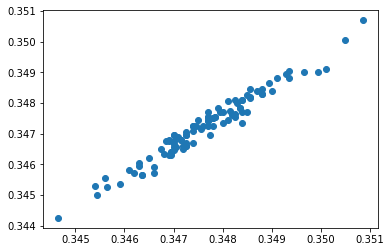

In [41]:
samples = []
for _ in range(100):  # 100 samples
    samples.append(pydoocs.read("FLASH.DIAG/TOROID.ML/*/CHARGE.FLASH1")['data'])
    time.sleep(0.1)  # read-out with repetition rate of ~10Hz
    
toroids = {element[4]: [] for element in samples[0]}  # generate output dict with all toroids
for sample in samples:  # fill output dict
    for element in sample:
        toroids[element[4]].append(element[1])
        
plot(toroids["3GUN"], toroids["1UBC3"], 'o');  # just print two of them against each other

The downside of this approach is that only works for one device. Synchronizing several devices would require memorizing and post-sorting the data utilizing the macropulse number. A better approach is to directly synchronize via the macropulse number as described below.

<a id="via-macropulse"></a>
### via macropulse number:

Synchronized readout via macropulse number can be achieved in the following way:

In [42]:
output1 = pydoocs.read("FLASH.DIAG/TOROID.ML/3GUN/CHARGE.FLASH1")
time.sleep(2)  # to simulate time lag between read calls in order to prevent intrinsic synchronization
output2 = pydoocs.read("FLASH.DIAG/TOROID.ML/3GUN/CHARGE.FLASH1", 
                       macropulse=output1["macropulse"])  # providing the macropulse from the first call

print(output2["macropulse"], output1["macropulse"], output2["macropulse"] - output1["macropulse"])

1717296712 1717296712 0


Without providing the macropulse from the first call, one would see a macropulse difference unequal 0 between the two calls:

In [43]:
output1 = pydoocs.read("FLASH.DIAG/TOROID.ML/3GUN/CHARGE.FLASH1")
time.sleep(2)
output2 = pydoocs.read("FLASH.DIAG/TOROID.ML/3GUN/CHARGE.FLASH1")

print(output2["macropulse"], output1["macropulse"], output2["macropulse"] - output1["macropulse"])

1717296752 1717296732 20


Of course, synchronized readout via macropulse number works for different locations, which is also demonstrated by the correlation plot (cf. the plot from the wildcard method above).

In [44]:
output1 = pydoocs.read("FLASH.DIAG/TOROID.ML/3GUN/CHARGE.FLASH1")
time.sleep(2)
output2 = pydoocs.read("FLASH.DIAG/TOROID.ML/1UBC3/CHARGE.FLASH1", macropulse=output1["macropulse"])

print(output2["macropulse"], output1["macropulse"], output2["macropulse"] - output1["macropulse"])

1717296752 1717296752 0


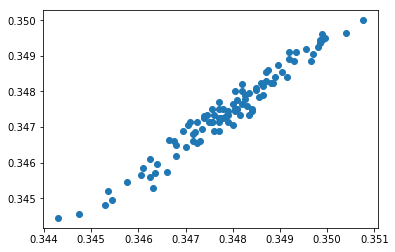

In [45]:
toroids = {"3GUN": [], "1UBC3": []}
for _ in range(100):  # 100 samples
    output = pydoocs.read("FLASH.DIAG/TOROID.ML/3GUN/CHARGE.FLASH1")
    toroids["3GUN"].append(output["data"])
    
    time.sleep(0.2)  # to simulate time lag between read calls to prevent intrinsic synchronization
               
    output = pydoocs.read("FLASH.DIAG/TOROID.ML/1UBC3/CHARGE.FLASH1", macropulse=output["macropulse"])
    toroids["1UBC3"].append(output["data"])
    
plot(toroids["3GUN"], toroids["1UBC3"], 'o');

In contrast to the wildcard approach, we can also synchronize different device:

In [53]:
output1 = pydoocs.read("FLASH.DIAG/TOROID.ML/3GUN/CHARGE.FLASH1")
time.sleep(2)
try:
    output2 = pydoocs.read("FLASH.DIAG/ORBIT/3GUN/X.FLASH1", macropulse=output1["macropulse"])
    
    print(output2["macropulse"], output1["macropulse"], output2["macropulse"] - output1["macropulse"])
except pydoocs.PyDoocsException as err:
    print(err)    

1717297167 1717297167 0


However, when the synchronization in the DOOCS server is not working properly or the time lag between calls is too large, differences in the requested and actual macropulse can occur, which in turn leads to a 'macropulse mismatch' PyDoocsException.

In [47]:
output = pydoocs.read("FLASH.DIAG/TOROID.ML/3GUN/CHARGE.FLASH1")
time.sleep(2)
try:
    pydoocs.read("FLASH.DIAG/ORBIT/3GUN/X.FLASH1", macropulse=output["macropulse"])
except pydoocs.PyDoocsException as err:
    print(err)

macropulse mismatch: (requested - actual) is -1


The DOOCS server support for synchronization via macropulse is currently very limited (see also [supported data types](#data-types) below), but this will certainly improve over time and with usage. 

<a id="data-types"></a>
## Supported data types:

The data types and operations on them, as discussed throughout this introduction, currently supported:

| Data type  | Read Support | Synchronization | Write Support | Write with Output |
|:----------:|:------------:|:---------------:|:-------------:|:-----------------:|
| BOOL       |      yes     |       no        |      yes      |        no         |
| INT        |      yes     |       no        |      yes      |        no         |
| LONG       |      yes     |       no        |      yes      |        no         |
| FLOAT      |      yes     |       yes       |      yes      |        no         |
| DOUBLE     |      yes     |       no        |      yes      |        no         |
| STRING     |      yes     |       no        |      yes      |        yes        |
| TEXT       |      yes     |       no        |      yes      |        no         |
| IFFF       |      yes     |       no        |      yes      |        no         |
| IIII       |      yes     |       no        |      yes      |        no         |
| A_INT      |      yes     |       no        |      yes      |        no         |
| A_LONG     |      yes     |       no        |      yes      |        no         |
| A_FLOAT    |      yes     |       no        |      yes      |        no         |
| A_DOUBLE   |      yes     |       no        |      yes      |        no         |
| A_BYTE     |      yes     |       no        |      no       |        no         |
| A_TS_FLOAT |      yes     |       no        |      no       |        no         |
| A_XYZS     |      yes     |       no        |      no       |        no         |
| A_XY       |      yes     |       no        |      no       |        no         |
| A_USTR     |      yes     |       no        |      no       |        no         |
| A_TDS      |      yes     |       no        |      no       |        no         |
| SPECTRUM   |      yes     |       yes       |      yes      |        no         |
| GSPECTRUM  |      yes     |       no        |      no       |        no         |
| IMAGE      |      yes     |       no        |      no       |        no         |
|            |              |                 |               |                   |


<a id="diff-previous"></a>
## The API breaking differences compared to the previous pydoocs version:

#### The old version has a 'channel' key, which has been removed in this new version, and the new version has an additional 'miscellaneous' key to store optional data in a dict (see also [read function](#read) above):

old version: 
```
pydoocs.read(TEST_SERVER_BASE_ADDRESS + "BOOL").keys()
dict_keys(['data', 'type', 'channel', 'timestamp', 'macropulse'])
```

In [48]:
pydoocs.read(TEST_SERVER_BASE_ADDRESS + "BOOL").keys()

dict_keys(['data', 'type', 'timestamp', 'macropulse', 'miscellaneous'])

#### The new version has no explicit 'numpy' keyword anymore, as it returns numpy array as a default whenever reasonable, e.g. for array types (see also [read function](#read) above):

old version:
```
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "IMAGE", numpy=True); type(output['data'])
numpy.ndarray
```

In [49]:
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "IMAGE"); type(output['data'])

numpy.ndarray

#### The new version either returns 'lists' or 'numpy.ndarrays' for non-skalar types as opposed to the old version, which returns 'tuples' or 'dicts' (see also [read function](#read) above):

old version: 
```
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "INTEGER_ARRAY"); type(output['data'])
tuple
```

In [50]:
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "INTEGER_ARRAY"); type(output['data'])

numpy.ndarray

old version: 
```
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "IFFF_ARRAY"); type(output['data'])
dict
```

In [51]:
output = pydoocs.read(TEST_SERVER_BASE_ADDRESS + "IFFF_ARRAY"); type(output['data'])

list

#### The 'OSError' exception in the old version has been replaced by the two custom exceptions DoocsException and PyDoocsException (see also [exceptions](#exceptions) above):

old version:<br>
```
try:
    pydoocs.read(TEST_SERVER_BASE_ADDRESS)
except OSError as err:
    print(err)
{'code': 101, 'message': 'illegal service'}

```

In [52]:
try:
    pydoocs.read(TEST_SERVER_BASE_ADDRESS)
except pydoocs.DoocsException as err:
    print(err)

{'code': 101, 'message': 'illegal service'}
